In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/macintosh/Library/Python/3.9/lib/python/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the Data #

In [3]:
train = pd.read_csv('./train.csv', index_col='id')
test = pd.read_csv('./test.csv', index_col='id')

In [4]:
train

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8


In [5]:
test

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
id,,,,,,,,,,,
10407,884.0,121.420000,35.360000,5.280000,82.561240,9.370384,2.298000,1.907200,1.200000,0.461899,1.79459
10408,90.0,9.931960,18.000000,5.600000,39.568056,12.086300,2.868000,1.652000,0.864000,0.476196,1.41194
10409,116.0,7.767992,11.600000,4.800000,23.231818,11.023840,2.644000,1.794000,0.960000,0.499514,0.78834
10410,100.0,9.107996,10.000000,4.800000,20.298893,12.086300,2.828000,1.662000,0.792000,0.495796,1.20466
10411,55.0,4.030000,11.000000,4.000000,22.977675,11.280950,2.455000,1.750000,0.893333,0.476095,0.93456
...,...,...,...,...,...,...,...,...,...,...,...
17341,446.0,36.135392,9.636364,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548
17342,36.0,3.550000,18.000000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045
17343,68.0,4.545328,11.333333,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


## Check for Null data ##

In [6]:
test.isnull().sum()

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

## Check for duplicated data ##

In [8]:
train.duplicated().sum()

0

# Overview of the training data # 

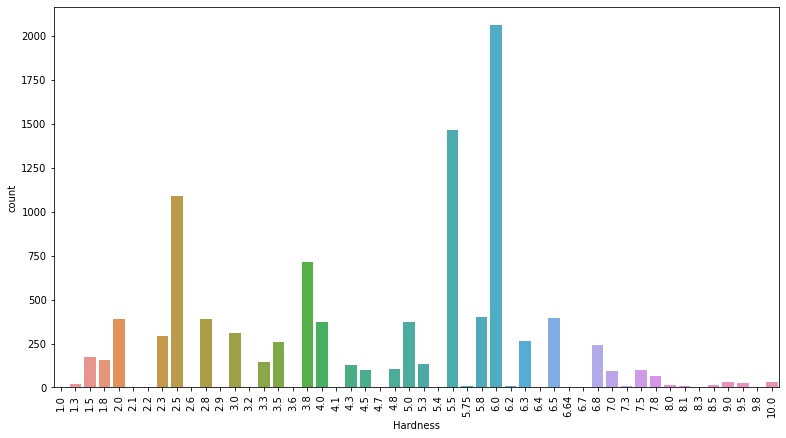

In [9]:
plt.figure(figsize=(13,7))
sns.countplot(data=train, x='Hardness')
plt.xticks(rotation=90);

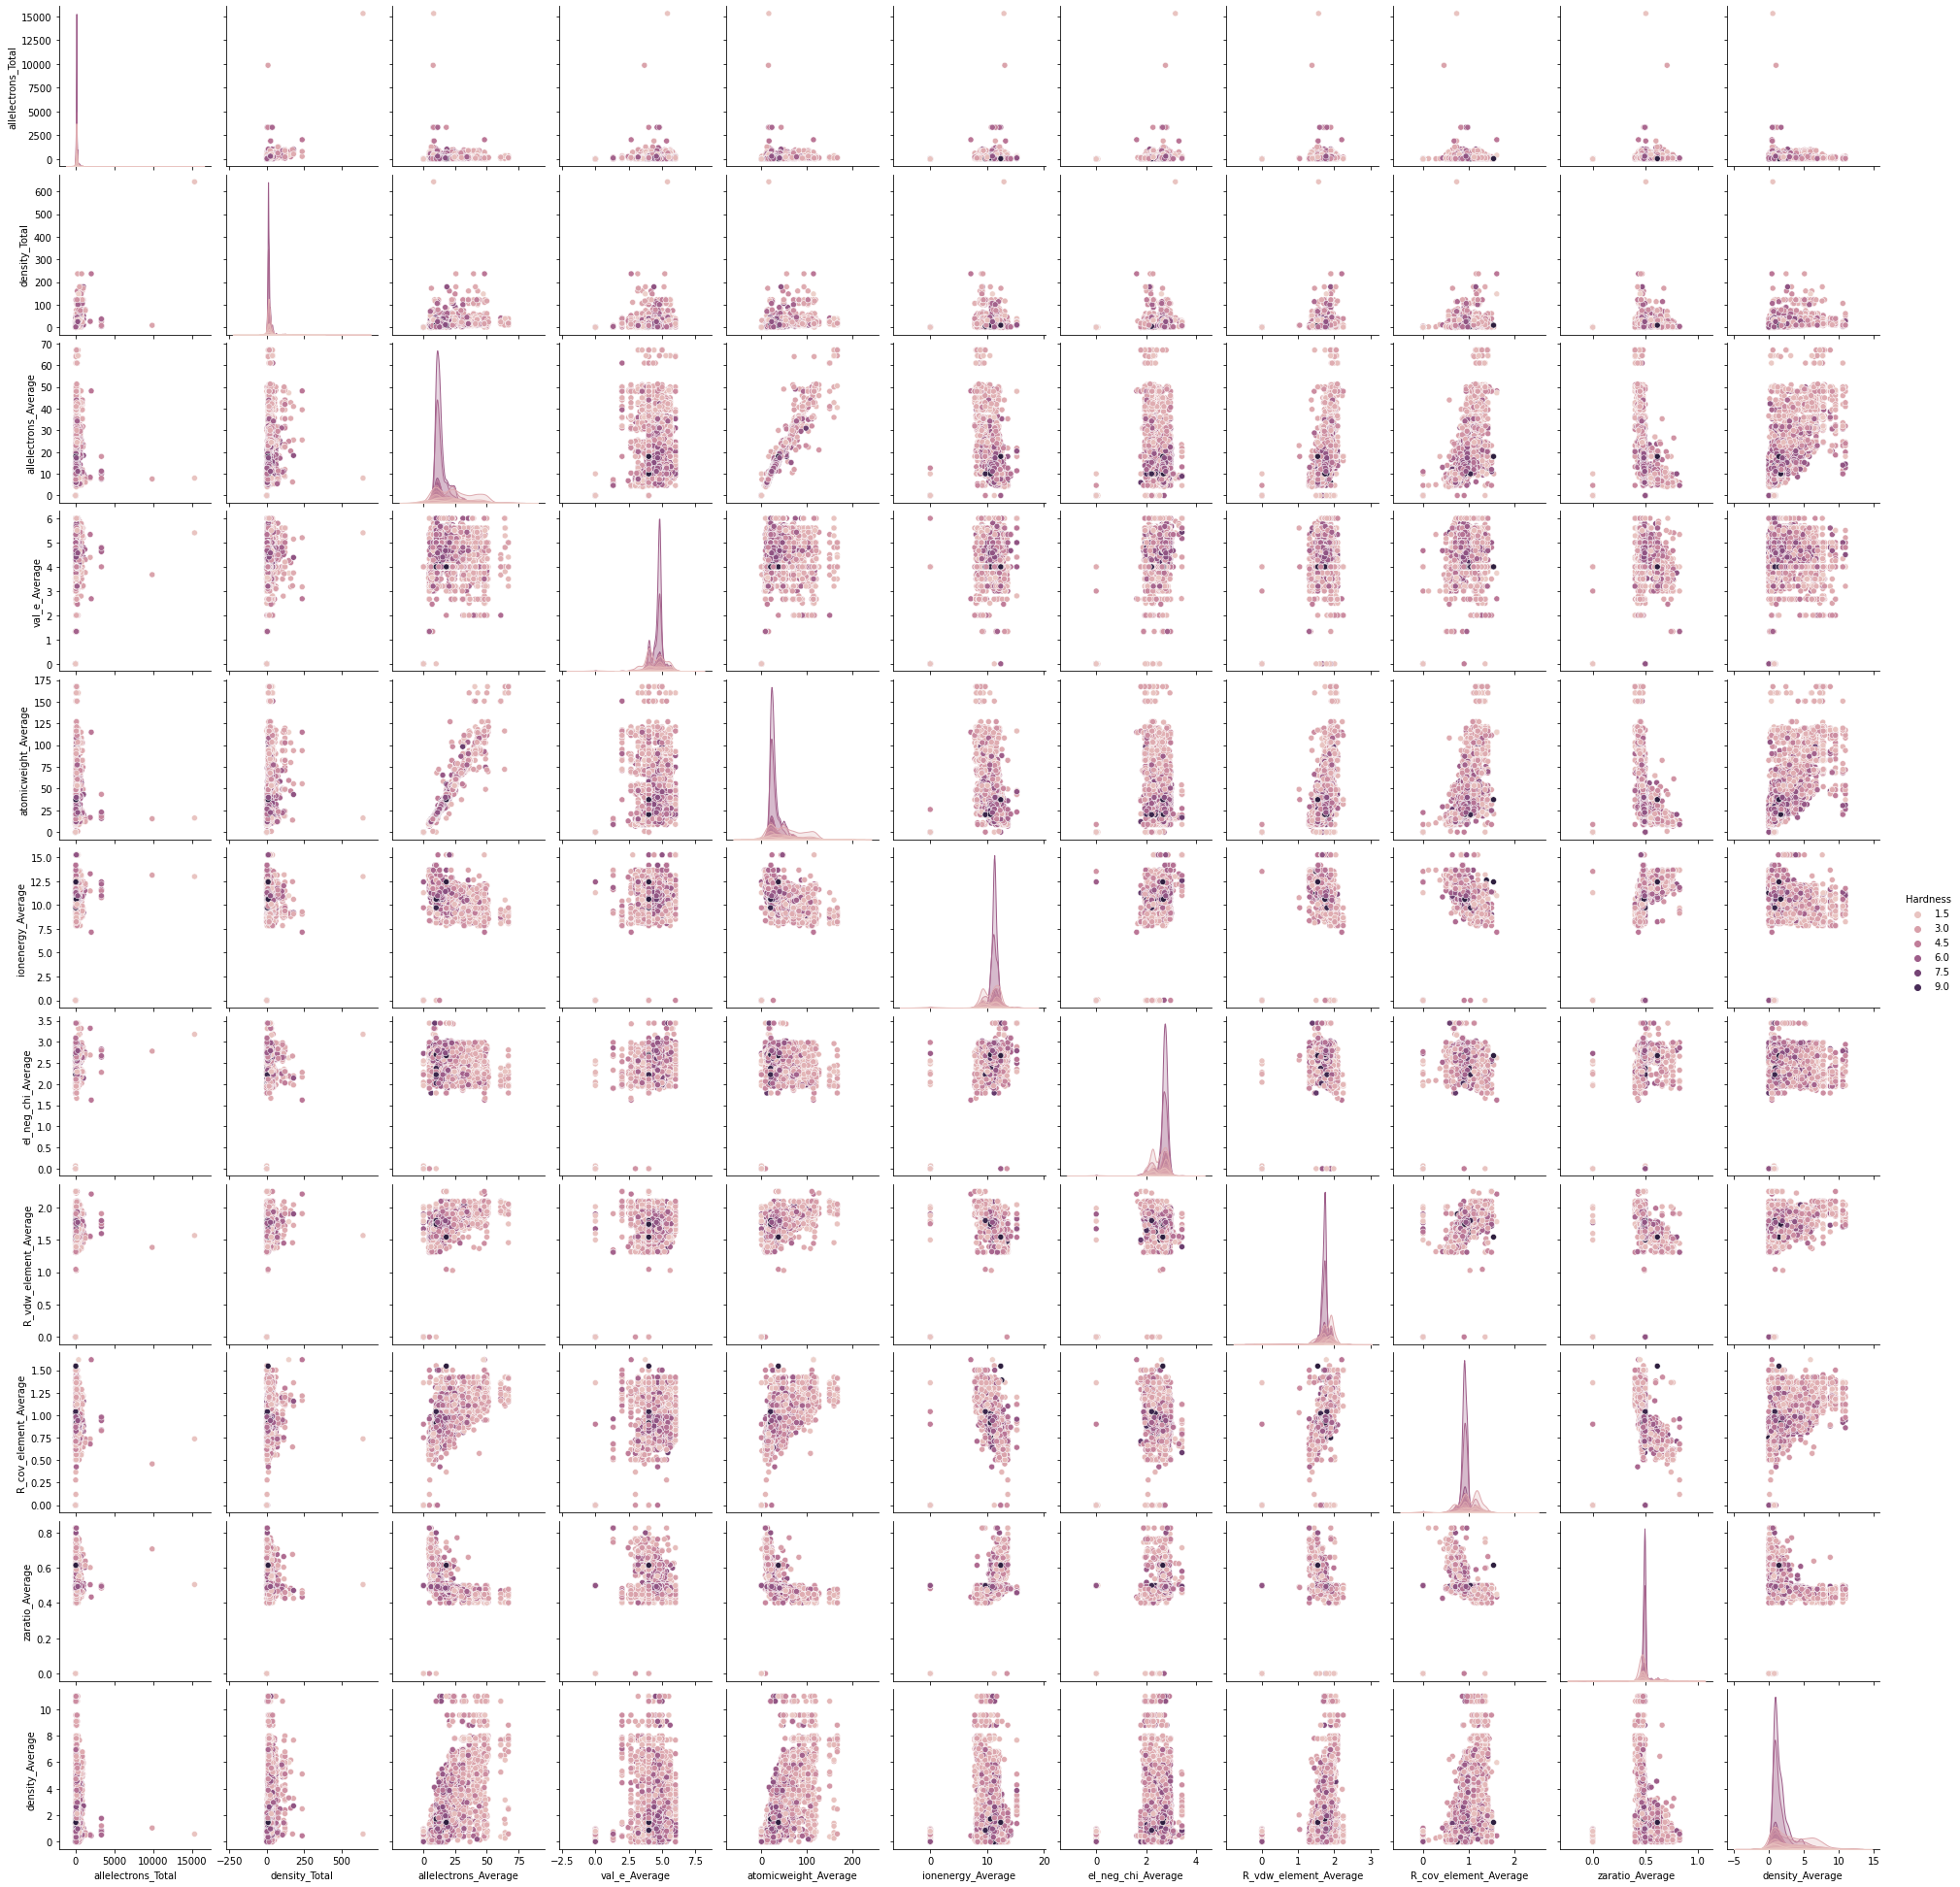

In [10]:
sns.pairplot(data=train, hue='Hardness')

<AxesSubplot:>

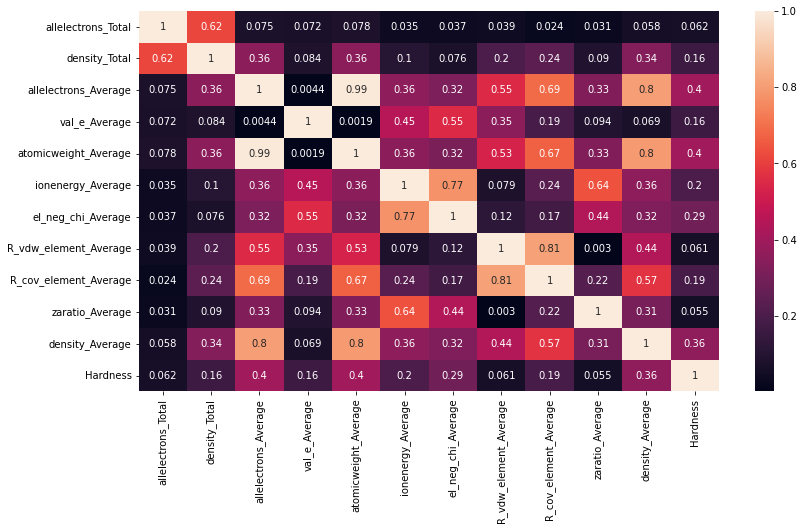

In [11]:
plt.figure(figsize=(13,7))
sns.heatmap(data=train.corr().abs(), annot=True)

<AxesSubplot:xlabel='atomicweight_Average', ylabel='allelectrons_Average'>

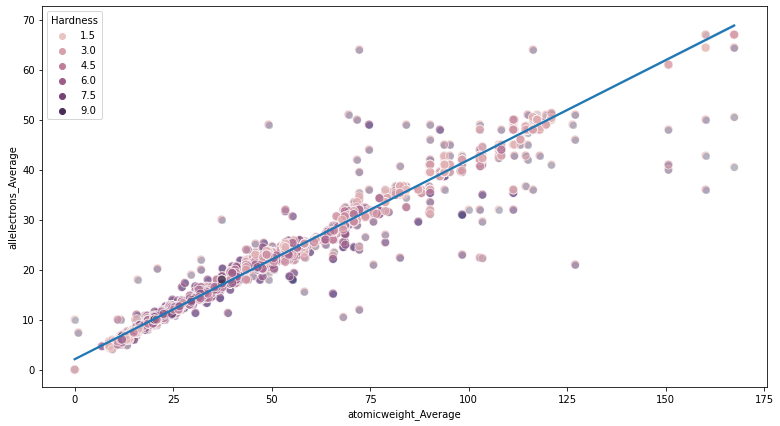

In [12]:
plt.figure(figsize=(13,7))
sns.regplot(data=train, x='atomicweight_Average', y='allelectrons_Average')
sns.scatterplot(data=train, x='atomicweight_Average', y='allelectrons_Average', hue='Hardness',s=80, alpha=.7)


Now we observe that the features 'atomicwieght_Average' and 'allelectrons_Average' are strongly correlated, thus we will get rid of one of them. 

In [13]:
train = train.drop('allelectrons_Average', axis=1)
test = test.drop('allelectrons_Average', axis=1)

In [14]:
X = train.drop('Hardness', axis=1)
y = train.Hardness

# Test Train Split #

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalizing the data #

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
test_scaled = scaler.transform(test)

# Report of the model #

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

In [21]:
def report(model, X_valid, y_valid):
    pred = model.predict(X_valid)
    print(f' The mean AE is {mean_absolute_error(y_pred=pred, y_true=y_valid)}')
    print(f' The mean SE is {mean_squared_error(y_pred=pred, y_true=y_valid)}')
    print(f' The median SE is {median_absolute_error(y_pred=pred, y_true=y_valid)}')
    return pred;

# Model XGB #

In [22]:
from xgboost import XGBRegressor

In [23]:
model_xgb = XGBRegressor()

In [24]:
model_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [77]:
pred_val_xbg = report(model_xgb, X_valid_scaled, y_valid)

 The mean AE is 0.9291610780386946
 The mean SE is 1.598766041010938
 The median SE is 0.6737802505493162


<AxesSubplot:xlabel='allelectrons_Total', ylabel='Hardness'>

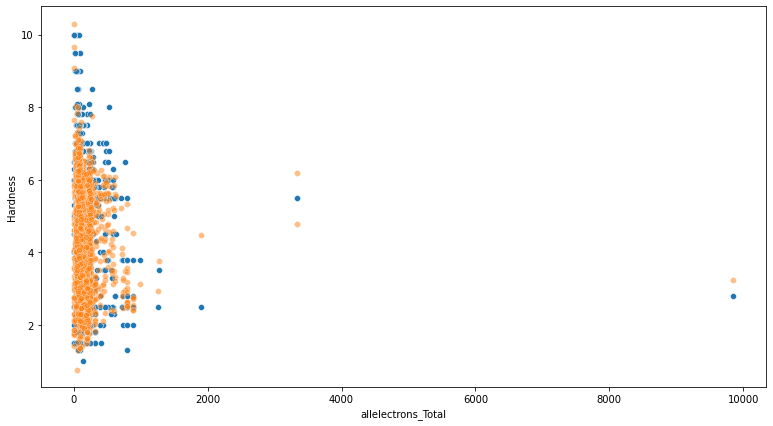

In [78]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=X_valid.allelectrons_Total, y=y_valid)
sns.scatterplot(x=X_valid.allelectrons_Total, y=pred_val_xbg, alpha=0.5)

In [36]:
prediction = model_xgb.predict(test_scaled)

In [37]:
prediction_xbg = pd.DataFrame(data=test)

In [38]:
prediction_xbg['Prediction Hardness'] = prediction
prediction_xbg

,allelectrons_Total,density_Total,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Prediction Hardness
id,,,,,,,,,,,
10407,884.0,121.420000,5.280000,82.561240,9.370384,2.298000,1.907200,1.200000,0.461899,1.79459,2.928926
10408,90.0,9.931960,5.600000,39.568056,12.086300,2.868000,1.652000,0.864000,0.476196,1.41194,2.422388
10409,116.0,7.767992,4.800000,23.231818,11.023840,2.644000,1.794000,0.960000,0.499514,0.78834,5.825199
10410,100.0,9.107996,4.800000,20.298893,12.086300,2.828000,1.662000,0.792000,0.495796,1.20466,3.995667
10411,55.0,4.030000,4.000000,22.977675,11.280950,2.455000,1.750000,0.893333,0.476095,0.93456,5.422699
...,...,...,...,...,...,...,...,...,...,...,...
17341,446.0,36.135392,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548,5.456395
17342,36.0,3.550000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045,4.040884
17343,68.0,4.545328,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425,4.887154


# Model NN #

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [154]:
model_nn = Sequential()

model_nn.add(Dense(11, activation='relu'))#, kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))
model_nn.add(BatchNormalization(synchronized=True))
#model_nn.add(Dropout(0.2))
model_nn.add(Dense(5, activation='relu'))
#model_nn.add(Dropout(0.2))
model_nn.add(Dense(1, activation='relu'))

model_nn.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['accuracy'])

In [155]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=0)

In [156]:
model_nn.fit(X_train_scaled, y_train,
            epochs = 100,
            validation_data = [X_valid_scaled, y_valid],
            batch_size = 30,
            callbacks = early_stop,
            verbose = 1)

Epoch 1/100


233/233 [==============================] - 1s 3ms/step - loss: 22.8291 - accuracy: 1.4343e-04 - val_loss: 16.8321 - val_accuracy: 2.9112e-04
Epoch 2/100
233/233 [==============================] - 0s 2ms/step - loss: 8.9112 - accuracy: 1.4343e-04 - val_loss: 3.4582 - val_accuracy: 2.9112e-04
Epoch 3/100
233/233 [==============================] - 0s 2ms/step - loss: 2.9312 - accuracy: 1.4343e-04 - val_loss: 2.2662 - val_accuracy: 2.9112e-04
Epoch 4/100
233/233 [==============================] - 0s 2ms/step - loss: 2.2544 - accuracy: 1.4343e-04 - val_loss: 2.0174 - val_accuracy: 2.9112e-04
Epoch 5/100
233/233 [==============================] - 0s 2ms/step - loss: 2.1143 - accuracy: 1.4343e-04 - val_loss: 1.9667 - val_accuracy: 2.9112e-04
Epoch 6/100
233/233 [==============================] - 0s 2ms/step - loss: 2.0781 - accuracy: 1.4343e-04 - val_loss: 1.9423 - val_accuracy: 2.9112e-04
Epoch 7/100
233/233 [==============================] - 0s 2ms/step - loss: 2.0308 - accuracy: 1.4343e-04

<AxesSubplot:>

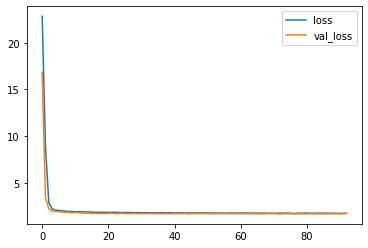

In [157]:
pd.DataFrame(data=model_nn.history.history)[['loss', 'val_loss']].plot()

In [158]:
pred_val_nn = report(model_nn, X_valid_scaled, y_valid)

108/108 [==============================] - 0s 1ms/step
 The mean AE is 0.9890232816748918
 The mean SE is 1.760563065668963
 The median SE is 0.7487973690032961


In [159]:
pred_val_nn.reshape((3435,))

array([5.931194 , 4.981195 , 3.6039927, ..., 3.059361 , 3.1894848,
       5.873872 ], dtype=float32)

<AxesSubplot:xlabel='allelectrons_Total', ylabel='Hardness'>

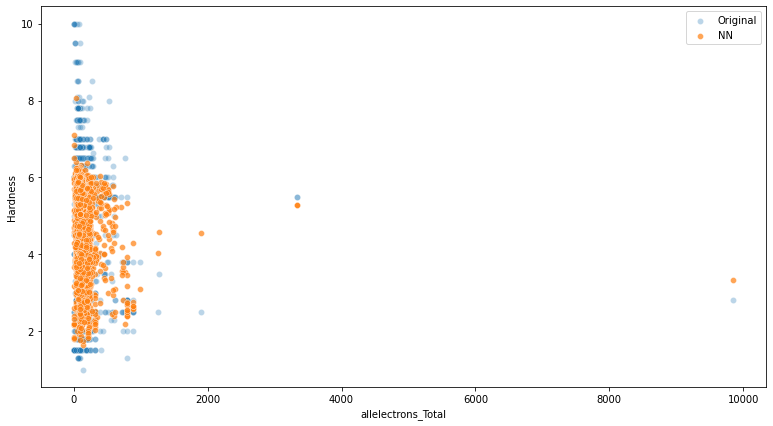

In [160]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=X_valid.allelectrons_Total, y=y_valid, alpha=0.3,label='Original')
sns.scatterplot(x=X_valid.allelectrons_Total, y=pred_val_nn.reshape((3435,)), alpha=0.7, label='NN')
#sns.scatterplot(x=X_valid.allelectrons_Total, y=pred_val_xbg, alpha=0.7, label='XBG')